In [20]:
import monkdata 
import dtree 
import math
import drawtree_qt5
import random
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = "retina"


In [5]:
dtree.entropy(monkdata.monk1)

1.0

In [6]:
dtree.entropy(monkdata.monk2)

0.957117428264771

In [7]:
dtree.entropy(monkdata.monk3)

0.9998061328047111

In [12]:
for i in range(6):
    print("Information gain for attribute a" + str(i +1) + " is " + str(dtree.averageGain(monkdata.monk3, monkdata.attributes[i])))

Information gain for attribute a1 is 0.007120868396071844
Information gain for attribute a2 is 0.29373617350838865
Information gain for attribute a3 is 0.0008311140445336207
Information gain for attribute a4 is 0.002891817288654397
Information gain for attribute a5 is 0.25591172461972755
Information gain for attribute a6 is 0.007077026074097326


In [22]:
# Part n°5

monk1_sub = []

for i in range(1,5):
    monk1_sub.append(dtree.select(monkdata.monk1, monkdata.attributes[4], i))
    print(len(dtree.select(monkdata.monk1, monkdata.attributes[4], i)))

29
31
30
34


In [23]:
for idx, subset in enumerate(monk1_sub):
    print("For a5 = " + str(idx + 1))
    for i in range(6):
        if i != 4:
            print("Information gain for attribute a" + str(i +1) + " is " + str(dtree.averageGain(subset, monkdata.attributes[i])))

For a5 = 1
Information gain for attribute a1 is 0.0
Information gain for attribute a2 is 0.0
Information gain for attribute a3 is 0.0
Information gain for attribute a4 is 0.0
Information gain for attribute a6 is 0.0
For a5 = 2
Information gain for attribute a1 is 0.040216841609413634
Information gain for attribute a2 is 0.015063475072186083
Information gain for attribute a3 is 0.03727262736015946
Information gain for attribute a4 is 0.04889220262952931
Information gain for attribute a6 is 0.025807284723902146
For a5 = 3
Information gain for attribute a1 is 0.03305510013455182
Information gain for attribute a2 is 0.002197183539100922
Information gain for attribute a3 is 0.017982293842278896
Information gain for attribute a4 is 0.01912275517747053
Information gain for attribute a6 is 0.04510853782483648
For a5 = 4
Information gain for attribute a1 is 0.20629074641530198
Information gain for attribute a2 is 0.033898395077640586
Information gain for attribute a3 is 0.025906145434984817
Inf

In [26]:
for idx, subset in enumerate(monk1_sub):
    print('The majority class for a5 = ' + str(idx + 1) + ' is ' + str(dtree.mostCommon(subset)))

The majority class for a5 = 1 is True
The majority class for a5 = 2 is False
The majority class for a5 = 3 is False
The majority class for a5 = 4 is False


In [54]:
tree = dtree.buildTree(monkdata.monk1, monkdata.attributes)
for idx, subset in enumerate(monk1_sub):
    print('For the tree with the ID3 routine, the majority class for a5 = ' + str(idx + 1))
    nb_true = 0
    nb_false = 0
    for sample in subset:
        if dtree.classify(tree=tree, sample=sample):
            nb_true += 1 
        else:
            nb_false += 1
    if nb_true > nb_false:
        print(" True ")
    else:
        print(" False ")

For the tree with the ID3 routine, the majority class for a5 = 1
 True 
For the tree with the ID3 routine, the majority class for a5 = 2
 False 
For the tree with the ID3 routine, the majority class for a5 = 3
 False 
For the tree with the ID3 routine, the majority class for a5 = 4
 False 


In [51]:
dtree.classify(tree, monkdata.monk1[0])

True

In [63]:
tree_1 = dtree.buildTree(monkdata.monk1, monkdata.attributes)
tree_2 = dtree.buildTree(monkdata.monk2, monkdata.attributes)
tree_3 = dtree.buildTree(monkdata.monk3, monkdata.attributes)

In [65]:
print('The accuracy for the tree on the MONK-1 train dataset is : ' + str(dtree.check(tree_1, monkdata.monk1)))
print('The accuracy for the tree on the MONK-1 test dataset is : ' + str(dtree.check(tree_1, monkdata.monk1test)))

The accuracy for the tree on the MONK-1 train dataset is : 1.0
The accuracy for the tree on the MONK-1 test dataset is : 0.8287037037037037


In [66]:
print('The accuracy for the tree on the MONK-3 train dataset is : ' + str(dtree.check(tree_3, monkdata.monk3)))
print('The accuracy for the tree on the MONK-3 test dataset is : ' + str(dtree.check(tree_3, monkdata.monk3test)))

The accuracy for the tree on the MONK-3 train dataset is : 1.0
The accuracy for the tree on the MONK-3 test dataset is : 0.9444444444444444


In [6]:
def pruned_construction(train, validation):
    tree = dtree.buildTree(train, monkdata.attributes)
    all_trees = dtree.allPruned(tree)
    for other_tree in all_trees:
        score = dtree.check(tree, validation)
        other_score = dtree.check(other_tree, validation)
        if other_score >= score:
            tree = other_tree
    return tree

In [41]:

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

def test_fraction(fraction):
    monk1train, monk1val = partition(monkdata.monk1, fraction)
    monk3train, monk3val = partition(monkdata.monk3, fraction)

    pruned_tree_1 = pruned_construction(monk1train, monk1val)
    pruned_tree_3 = pruned_construction(monk3train, monk3val)

    test_score_1 = dtree.check(pruned_tree_1, monkdata.monk1test)
    test_score_3 = dtree.check(pruned_tree_3, monkdata.monk3test)

    return test_score_1, test_score_3

def test_fractions(fractions):
    scores_1, scores_3 = [], []
    for fraction in fractions:
        test_score_1, test_score_3 = test_fraction(fraction)
        scores_1.append(test_score_1)
        scores_3.append(test_score_3)
    return scores_1, scores_3




In [42]:
fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
nb_test = 10000
scores_1, scores_3 = [], []

for _ in range(nb_test):
    test_scores_1, test_scores_3 = test_fractions(fractions=fractions)
    scores_1.append(test_scores_1)
    scores_3.append(test_scores_3)

In [43]:
scores_1_mean = np.array(scores_1).mean(axis=0)
scores_3_mean = np.array(scores_3).mean(axis=0)
scores_1_std = np.array(scores_1).std(axis=0)
scores_3_std = np.array(scores_3).std(axis=0)


In [44]:
scores_1_mean

array([0.76436644, 0.79026412, 0.81330463, 0.83135833, 0.84311713,
       0.85179907])

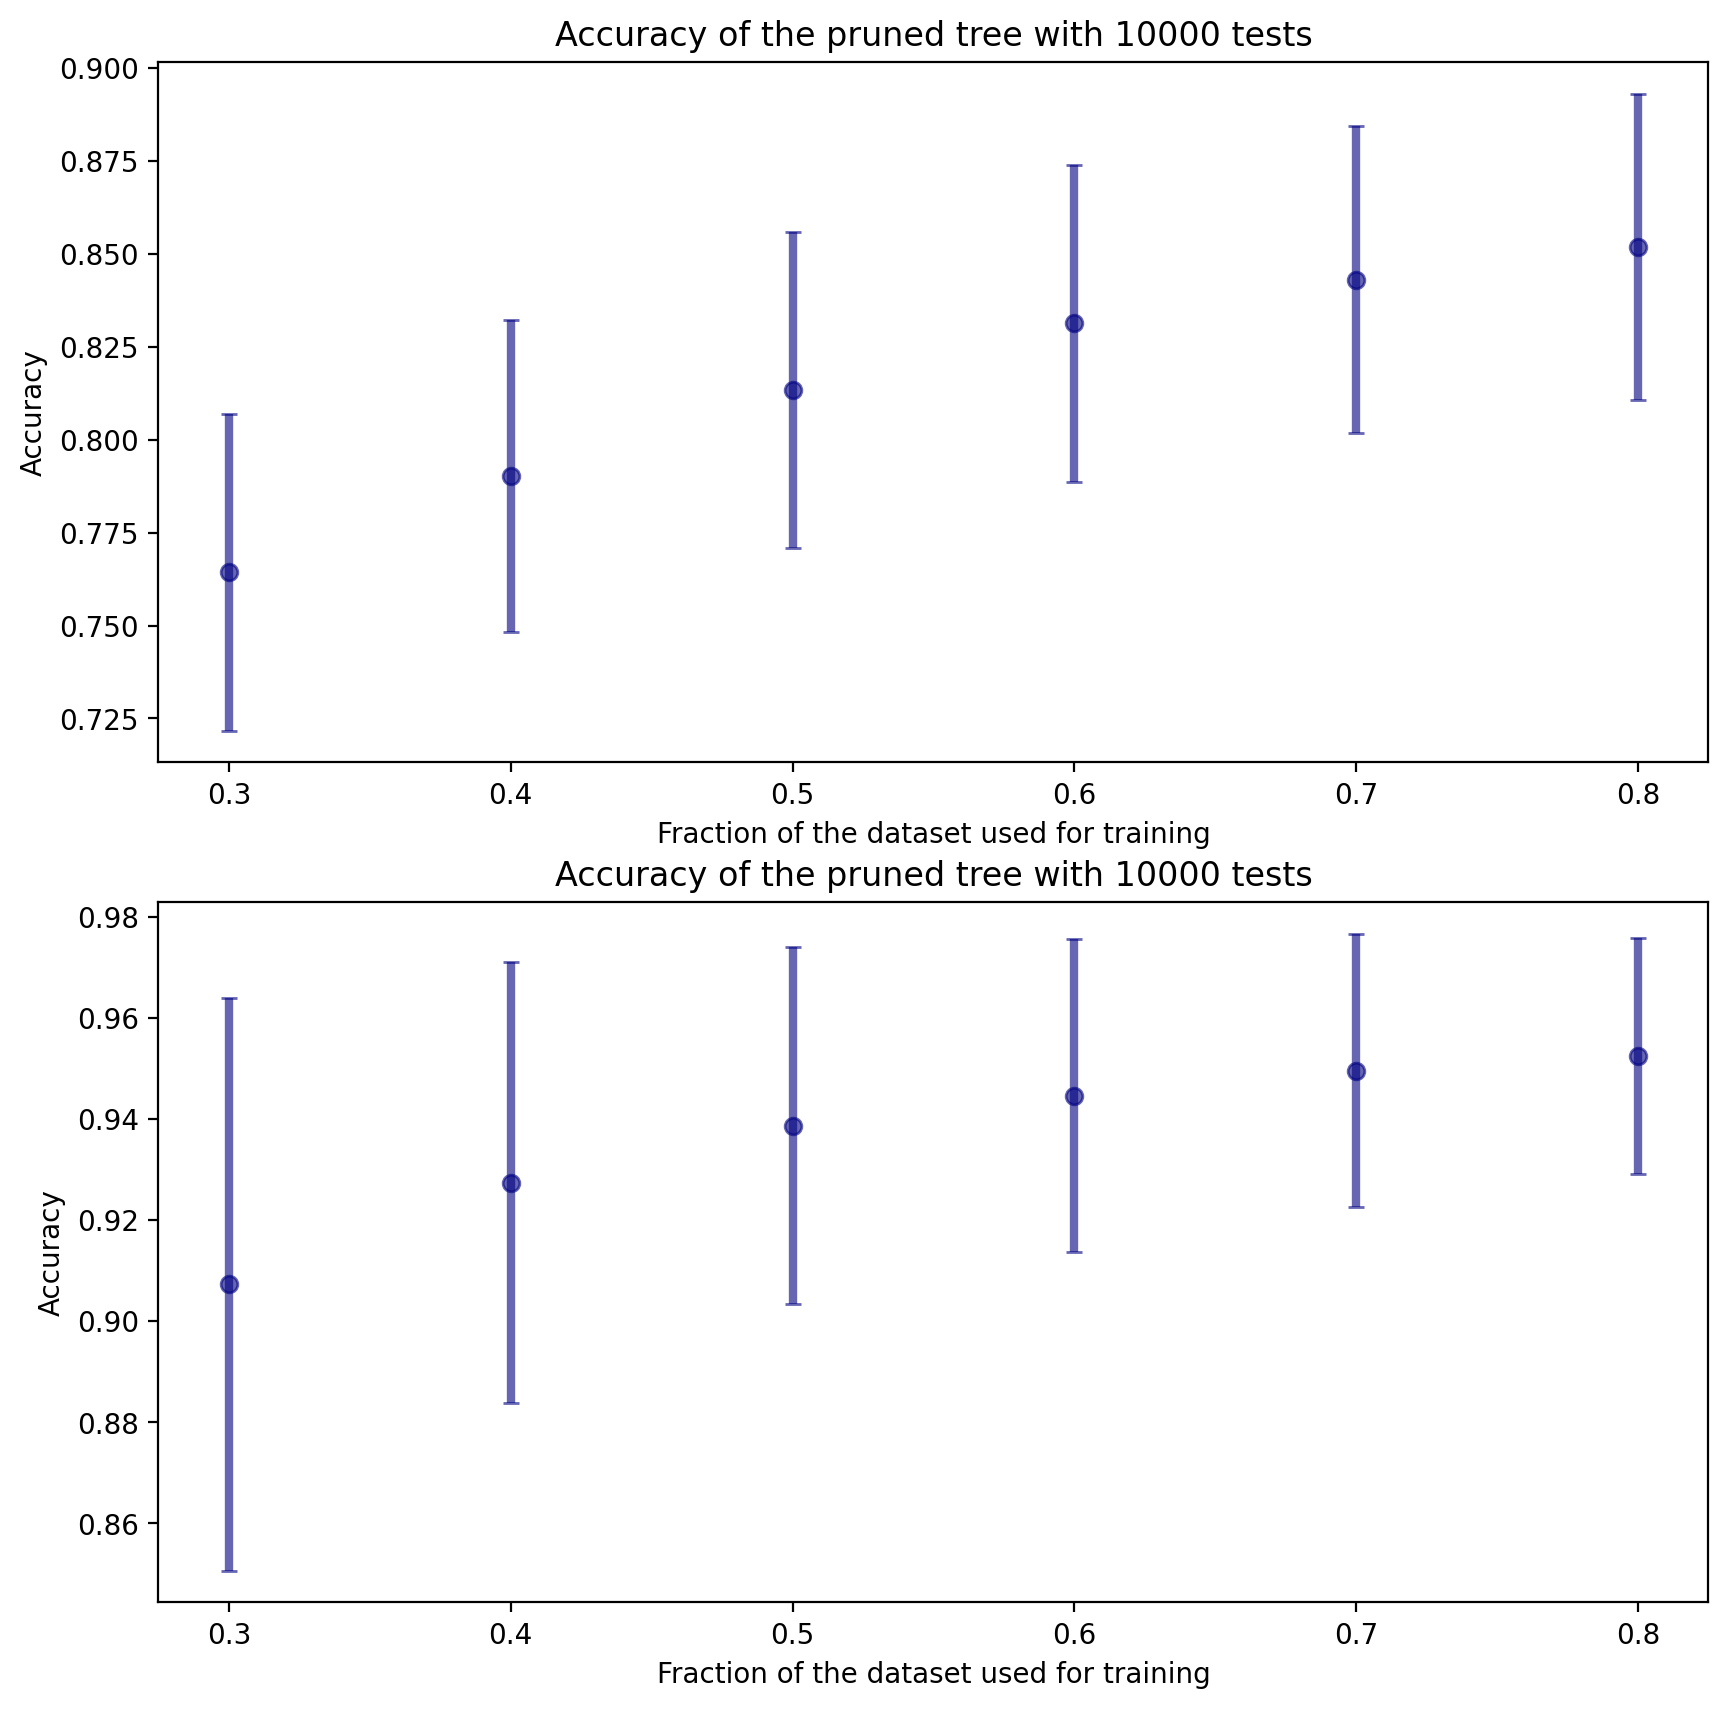

In [46]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].errorbar(
    x=fractions,
    y=scores_1_mean,
    yerr=scores_1_std,
    fmt="o",
    color="navy",
    ecolor="navy",
    elinewidth=3,
    capsize=3,
    label="MONK-1",
    alpha=0.6,
)
axes[1].errorbar(
    x=fractions,
    y=scores_3_mean,
    yerr=scores_3_std,
    fmt="o",
    color="navy",
    ecolor="navy",
    elinewidth=3,
    capsize=3,
    label="MONK-3",
    alpha=0.6
)
axes[0].set_title('Accuracy of the pruned tree with ' + str(nb_test) + ' tests')
axes[1].set_title('Accuracy of the pruned tree with ' + str(nb_test) + ' tests')
axes[0].set_xlabel('Fraction of the dataset used for training')
axes[1].set_xlabel('Fraction of the dataset used for training')
axes[0].set_ylabel('Accuracy')
axes[1].set_ylabel('Accuracy')
plt.show()

In [81]:
pruned_tree_1 = pruned_construction(monk1train, monk1val)
tree_1 = dtree.buildTree(monkdata.monk1, monkdata.attributes)

print('The accuracy for the regular tree on the MONK-1 test dataset is : ' + str(dtree.check(tree_1, monkdata.monk1test)))
print('The accuracy for the pruned tree on the MONK-1 test dataset is : ' + str(dtree.check(pruned_tree_1, monkdata.monk1test)))

The accuracy for the regular tree on the MONK-1 test dataset is : 0.8287037037037037
The accuracy for the pruned tree on the MONK-1 test dataset is : 0.875


In [82]:
pruned_tree_3 = pruned_construction(monk3train, monk3val)
tree_3 = dtree.buildTree(monkdata.monk3, monkdata.attributes)

print('The accuracy for the regular tree on the MONK-3 test dataset is : ' + str(dtree.check(tree_3, monkdata.monk3test)))
print('The accuracy for the pruned tree on the MONK-3 test dataset is : ' + str(dtree.check(pruned_tree_3, monkdata.monk3test)))

The accuracy for the regular tree on the MONK-3 test dataset is : 0.9444444444444444
The accuracy for the pruned tree on the MONK-3 test dataset is : 0.9907407407407407
